In [15]:
import pandas as pdi
import matplotlib.pylab as plt 
import numpy as np
%matplotlib inline

In [2]:
train_data = pd.read_csv('../dataset/tahmostation2016.csv')
odm = pd.read_csv('../dataset/mesonet_2008.csv')

In [4]:
t_station = "TA00021"
k_station = ["TA00020","TA00025","TA00057","TA00066","TA00024"]


In [72]:
d_stn = "ALTU"
ok_station = ["TIPT","MANG","HOLL","HOBA","RETR"]

In [6]:
thm = train_data[[t_station]+k_station]

In [67]:
def rain_day_events(station, dt, thresh = 5.0):
    #rainy_readings = dt[dt[station]> thresh]
    rainy_days = np.where(dt[station]> thresh)
    return rainy_days


In [73]:
vect = odm[[d_stn] + ok_station]

In [74]:
vect.head(5)

,ALTU,TIPT,MANG,HOLL,HOBA,RETR
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
thresh = 1.0
events = rain_day_events(d_stn, vect, thresh)
print events,len(events[0])


(array([ 46,  47,  61,  62,  63,  76,  77,  78,  99, 100, 101, 113, 114,
       117, 118, 126, 127, 128, 134, 135, 136, 147, 148, 157, 158, 160,
       161, 166, 167, 168, 169, 170, 171, 172, 179, 180, 190, 191, 193,
       194, 195, 210, 211, 220, 221, 223, 224, 227, 228, 230, 231, 232,
       251, 252, 253, 254, 255, 256, 279, 280, 286, 287, 288, 289]),) 64


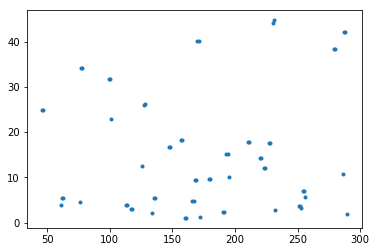

In [87]:
plt.plot(vect[d_stn][events[0]], '.')

In [114]:
thresh = 1.0
thm_r = thm[thm.TA00021> thresh]
rainy_days = np.where(thm.TA00021>thresh)
print rainy_days, rainy_days[0].shape

(array([ 10,  12,  13,  14,  16,  17,  18,  19,  41,  42,  67,  68,  76,
        77,  81,  89,  90,  91,  92,  93,  94,  95,  98, 100, 102, 104,
       105, 107, 108, 109, 110, 113, 116, 117, 119, 120, 121, 122, 123,
       124, 126, 127, 130, 131, 132, 133, 140, 141, 144, 147, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 182, 186,
       190, 192, 193, 194, 195, 198, 199, 202, 203, 204, 205, 207, 210,
       211, 215, 217, 218, 220, 252, 255, 257, 259, 260, 262, 263, 264,
       267, 269, 270, 275, 276, 278, 294, 295, 296, 297, 330]),) (102,)


In [115]:
rain_day_events(t_station, thm)

(array([ 10,  13,  14,  17,  18,  41,  67,  68,  77,  81,  90,  91,  92,
         94,  98, 100, 102, 104, 107, 108, 109, 110, 113, 116, 119, 120,
        121, 126, 127, 130, 131, 140, 141, 144, 147, 165, 166, 168, 170,
        171, 172, 173, 174, 176, 178, 190, 192, 193, 194, 199, 202, 203,
        204, 205, 207, 211, 218, 220, 255, 260, 262, 263, 264, 267, 269,
        275, 278, 296, 330]),)

102


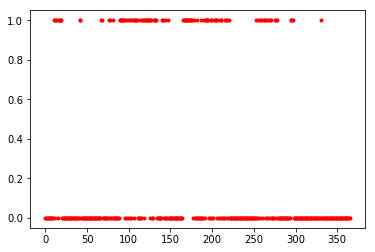

In [116]:
rain_events = (thm.TA00021> thresh)
count_events = np.count_nonzero(rain_events)
print count_events
plt.plot(rain_events, '.r')

(0.5, 40)

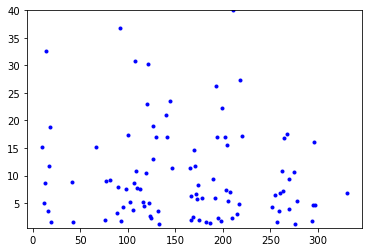

In [117]:
plt.plot(thm.TA00021[rainy_days[0]],'.b')
plt.ylim([0.5,40])


In [94]:
ix = rainy_days[0]

In [118]:
series = thm.TA00021.as_matrix()
from collections import defaultdict

In [119]:
rainy_days

(array([ 10,  12,  13,  14,  16,  17,  18,  19,  41,  42,  67,  68,  76,
         77,  81,  89,  90,  91,  92,  93,  94,  95,  98, 100, 102, 104,
        105, 107, 108, 109, 110, 113, 116, 117, 119, 120, 121, 122, 123,
        124, 126, 127, 130, 131, 132, 133, 140, 141, 144, 147, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 182, 186,
        190, 192, 193, 194, 195, 198, 199, 202, 203, 204, 205, 207, 210,
        211, 215, 217, 218, 220, 252, 255, 257, 259, 260, 262, 263, 264,
        267, 269, 270, 275, 276, 278, 294, 295, 296, 297, 330]),)

In [136]:
group = defaultdict(int)
group_num = []
g = 0
filter_length = 2
for i, ix in enumerate(series):
    if ix>thresh:
        group_num.append(i)
    else:
        if len(group_num)>0:
            group[g] = group_num
            group_num = []
            g +=1
if filter_length>1:
    group = { key:value for key, value in group.iteritems() if len(value)>filter_length}



In [137]:
group

{1: [12, 13, 14],
 2: [16, 17, 18, 19],
 7: [89, 90, 91, 92, 93, 94, 95],
 12: [107, 108, 109, 110],
 15: [119, 120, 121, 122, 123, 124],
 17: [130, 131, 132, 133],
 21: [165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176],
 26: [192, 193, 194, 195],
 28: [202, 203, 204, 205],
 38: [262, 263, 264],
 43: [294, 295, 296, 297]}

In [21]:
import pyad
import numpy as np

In [44]:
ff = pyad.IsolationForest(thm_r.as_matrix(), ntree=100)

Number of samples cann't be greater than sample size,then data will be used


In [46]:
score  = ff.score(thm_r.as_matrix())

In [47]:
iscore = np.argsort(score)

In [48]:
iscore

array([142, 135, 131, 127, 118,  39,  90,   1, 132, 126, 125,  89,   0,
       106,  26,  51, 141,  15,  86,  36,  91,  14, 111, 110, 103,  76,
        29,  17,  68, 171, 172,  75,  13, 128,  25, 174, 119,  38, 105,
        37,  47,  87,  27,  77,  92,  59,  46, 114,  49, 107,  16, 117,
       115, 102, 165,   8, 124, 160, 112, 104, 109,   2,  82, 180,  84,
        24, 175, 108, 134,  88, 164, 100, 113,  85, 159, 133,  23,  28,
       101, 168, 156, 158,  30, 166, 130, 139, 178,  96,  12, 122, 176,
       170, 163, 116, 147, 173,  74,  99, 161,  50,  31, 167, 120, 179,
        67,  33,  69,  20,  83,  11, 123,  58, 140, 154, 136,  45, 121,
       149,  48, 169, 157, 162, 155, 151, 137, 143, 153, 144, 152,  97,
        72,  19,  93, 129,   3,  81, 146,  95, 177,  44,   9,  32, 138,
        35,  94,  10,  42,  98,  70,   5, 150, 145,  56, 148,  53,  65,
        55,  62,  57,   4,  66,  18,  40,  54,  60,  52,  34,  73,   7,
        79,  80,  21,  61,  78,  71,  22,  43,  64,  63,  41,   

In [49]:
sortedd = thm_r.iloc[iscore]

In [50]:
sortedd

,TA00020,TA00025,TA00057,TA00066,TA00024
311,0.04,0.00,0.00,0.00,0.00
303,0.04,0.00,0.00,0.00,0.00
299,0.04,0.00,0.00,0.00,0.00
287,0.04,0.00,0.00,0.00,0.00
241,0.04,0.00,0.00,0.00,0.00
85,0.04,0.00,0.00,0.00,0.00
155,0.02,0.00,0.00,0.00,0.00
10,0.02,0.00,0.00,0.00,0.00
300,0.02,0.00,0.00,0.00,0.00
285,0.02,0.00,0.00,0.00,0.00


In [5]:
!ls

datasource   geojson	  LICENSE	   main.py  README.md  services  util
experiments  __init__.py  localdatasource  model    RQC.py     test	 view
